In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy

# 优化（Optimization）和非线性方法（Non-linear Methods）

有时候必须要去接一些非线性的方程或者方程组。通常这些非线性方程都呈现为优化问题（optimization problems）

## 样例：最大似然估计（Maximum Likelihood Estimation，缩写为MLE）

回忆一下最大似然估计（MLE）,这个过程中我们要对一个参数值 $\theta$ 进行估计，使得这个参数能够让一个对数似然概率函数（log-likelihood function） $\ell(X;\theta)$取最大值。 设 $X_1,...,X_n$ 是一个独立同分布集合（iid set），集合中的元素为随机变量，服从概率分布函数（Probability Distribution Function，缩写为 PDF $f(x;\theta)$, 其中的 $\theta \in \mathbb{R}^k$ 是一个参数。这个似然函数就是：


$$L(X;\theta) = \prod_{i=1}^n f(X_i;\theta)$$



我们想要得到的是能够让函数值 $L$ 最大的$\theta$。这个很好实现，可以先对 $L$ 求关于 $\theta$ 的一阶导数（first derivative，或梯度 gradient），设导数值为零，然后求得对应的 $\theta$，就是我们要找的了。然而，如果我们先对函数 $L$ 取对数得到 $\log(L)$，然后去求解就更容易一些了，由于函数 $L$ 是几个密度函数（densities）的乘积（product），所以求对数之后就把累乘转换成了累加。由于对数函数是一个单调递增函数，所以使得对数函数 $\log(L)$ 最大化的 $\theta$ 必然也能使 $L$ 取最大值 。

$$
\begin{eqnarray*}
\ell(X;\theta) &=& \log(L(X;\theta)) \\\\
&=& \log\left(\prod_{i=1}^n f(X_i;\theta)\right)\\\\
&=&\sum_{i=1}^n \log(f(X_i;\theta)
\end{eqnarray*}
$$

优化过程也就是找到下面这个方程的零点的过程：

$$
\begin{eqnarray*}
\frac{\partial\ell}{\partial \theta} &=& \frac{\partial}{\partial \theta} \left(\sum_{i=1}^n\log(f(X_i;\theta)\right)\\\\
&=& \sum_{i=1}^n \frac{\partial\log(f(X_i;\theta)}{\partial \theta}
\end{eqnarray*}
$$

## 二分法（Bisection Method）

二分法是对一个非线性函数求零点的最简单方法之一。这个方法能够保证找到一个根（root），但也可能会非常慢才能找到。这个方法的核心思想是源自于中值定理（intermediate value theorem）：如果$f(a)$和$f(b)$有不同的符号，并且函数$f$是连续函数，那么$f$在$a$和$b$之间必然有一个零点。我们就在这两个点中间取一个中点（midpoint），$c = \frac12(a+b)$。$f(c)$这个点要么是零，要么和$f(a)$或者$f(b)$当中的一个有相同的符号。如果$f(c)$和$f(a)$同号，那么就在新的区间$[c,b]$上重复上面的步骤。

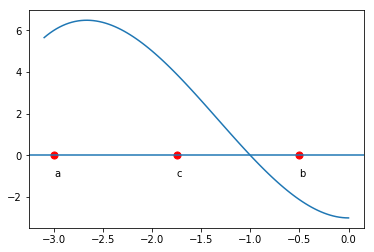

In [17]:
def f(x):
    return x**3 + 4*x**2 -3

x = np.linspace(-3.1, 0, 100)
plt.plot(x, x**3 + 4*x**2 -3)

a = -3.0
b = -0.5
c = 0.5*(a+b)

plt.text(a,-1,"a")
plt.text(b,-1,"b")
plt.text(c,-1,"c")

plt.scatter([a,b,c], [f(a), f(b),f(c)], s=50, facecolors='none')
plt.scatter([a,b,c], [0,0,0], s=50, c='red')

xaxis = plt.axhline(0);

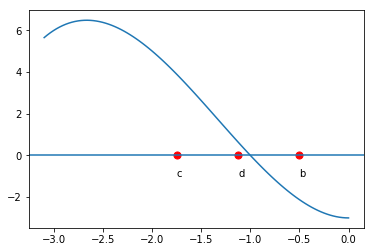

In [18]:

x = np.linspace(-3.1, 0, 100)
plt.plot(x, x**3 + 4*x**2 -3)

d = 0.5*(b+c)

plt.text(d,-1,"d")
plt.text(b,-1,"b")
plt.text(c,-1,"c")

plt.scatter([d,b,c], [f(d), f(b),f(c)], s=50, facecolors='none')
plt.scatter([d,b,c], [0,0,0], s=50, c='red')

xaxis = plt.axhline(0);

当我们觉得得到的新的中点（midpoint）足够接近零点的时候，就可以终止整个二分法的过程

## 割线法（Secant Method）

割线法也是由两个初始点开始的，但并没有限制要求这两个点必须有相反的符号。而是使用割线（secant line）来推导（extrapolate）下一个候选的点。

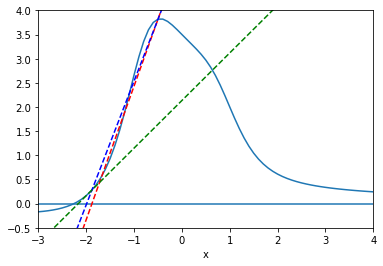

In [19]:
def f(x):
    return (x**3-2*x+7)/(x**4+2)

x = np.arange(-3,5, 0.1);
y = f(x)

p1=plt.plot(x, y)
plt.xlim(-3, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)
t = np.arange(-10, 5., 0.1)

x0=-1.2
x1=-0.5
xvals = []
xvals.append(x0)
xvals.append(x1)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--']
while (notconverge==1 and count <  3):
    slope=(f(xvals[count+1])-f(xvals[count]))/(xvals[count+1]-xvals[count])
    intercept=-slope*xvals[count+1]+f(xvals[count+1])
    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(f(nextval)) < 0.001:
        notconverge=0
    else:
        xvals.append(nextval)
    count = count+1

plt.show()

割线法的一大优势就是收敛速度很快。二分法是线性收敛速率的（也就是说差值趋近于零的速度大概是相当于$h(x) = x$ 趋近于零的速度），而割线法的收敛速率比线性更快，但还没达到二次（quadratic），$\sim x^\alpha$, 其中 $\alpha = \frac{1+\sqrt{5}}2 \approx 1.6$，大概是1.6次左右。

## 牛顿-拉普森法（Newton-Rhapson Method）

我们的目标是要找出能够使得可微函数（differentiable function）$g(\theta)=0$ 的$\theta$ 值。


思路：先猜测一个，$\theta_0$。用 $\tilde{\theta}$ 来表示对应$g(\theta)$的真实$\theta$值，另外设 $h = \tilde{\theta} - \theta_0$。于是则有：

$$
\begin{eqnarray*}
g(\tilde{\theta}) &=& 0 \\\\
&=&g(\theta_0 + h) \\\\
&\approx& g(\theta_0) + hg'(\theta_0)
\end{eqnarray*}
$$

这也就表明： 

$$ h\approx \frac{g(\theta_0)}{g'(\theta_0)}$$

所以则有：

$$\tilde{\theta}\approx \theta_0 - \frac{g(\theta_0)}{g'(\theta_0)}$$


然后，我们再进行一下近似：

$$\theta_1 = \theta_0 - \frac{g(\theta_0)}{g'(\theta_0)}$$


这样就构建了一个迭代过程了：

$$\theta_n = \theta_{n-1} - \frac{g(\theta_{n-1})}{g'(\theta_{n-1})}$$

#### 样例

设 $$g(x) = \frac{x^3-2x+7}{x^4+2}$$


这个函数的图像为：

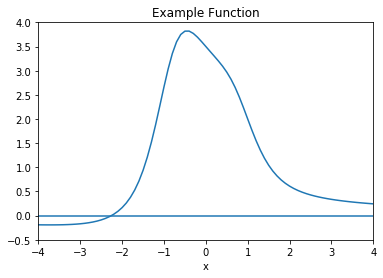

In [20]:
x = np.arange(-5,5, 0.1);
y = (x**3-2*x+7)/(x**4+2)

p1=plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)
plt.title('Example Function')
plt.show()

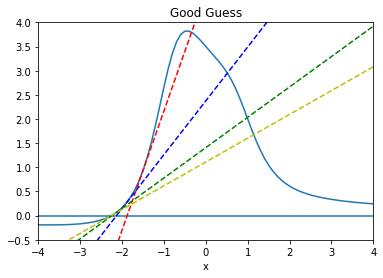

In [21]:

x = np.arange(-5,5, 0.1);
y = (x**3-2*x+7)/(x**4+2)

p1=plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)
plt.title('Good Guess')
t = np.arange(-5, 5., 0.1)

x0=-1.5
xvals = []
xvals.append(x0)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--','c--','m--','k--','w--']
while (notconverge==1 and count <  6):
    funval=(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)
    slope=-((4*xvals[count]**3 *(7 - 2 *xvals[count] + xvals[count]**3))/(2 + xvals[count]**4)**2) + (-2 + 3 *xvals[count]**2)/(2 + xvals[count]**4)
   
    intercept=-slope*xvals[count]+(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)

    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(funval) < 0.01:
        notconverge=0
    else:
        xvals.append(nextval)
    count = count+1

plt.show()



从上面的函数图像可以看出零点大概在 -2 附近。所以咱们初始猜测值就设 $$x=-1.5$$

咱们第一次就猜得很合适，可以看到迅速的收敛。

In [22]:
funval

0.007591996330867034

实际上，牛顿-拉普森法（Newton-Rhapson method）是二次收敛的（converges quadratically）。然而，这个方法和割线法一样，都有一个致命的不足之处（fatal flaw）：

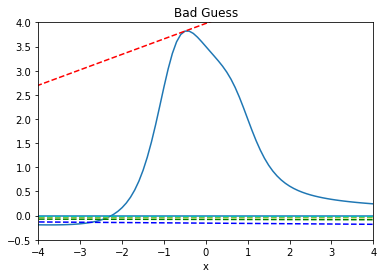

In [23]:

x = np.arange(-5,5, 0.1);
y = (x**3-2*x+7)/(x**4+2)

p1=plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)
plt.title('Bad Guess')
t = np.arange(-5, 5., 0.1)

x0=-0.5
xvals = []
xvals.append(x0)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--','c--','m--','k--','w--']
while (notconverge==1 and count <  6):
    funval=(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)
    slope=-((4*xvals[count]**3 *(7 - 2 *xvals[count] + xvals[count]**3))/(2 + xvals[count]**4)**2) + (-2 + 3 *xvals[count]**2)/(2 + xvals[count]**4)
   
    intercept=-slope*xvals[count]+(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)

    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(funval) < 0.01:
        notconverge = 0
    else:
        xvals.append(nextval)
    count = count+1

plt.show()


如上图所示，如果初始值估计不当，就可能出现上图这种最终卡在平行线位置的情况。这样算法就不能收敛了。

### 吸引力盆地可以“闭合”（Basins of Attraction Can Be 'Close'）

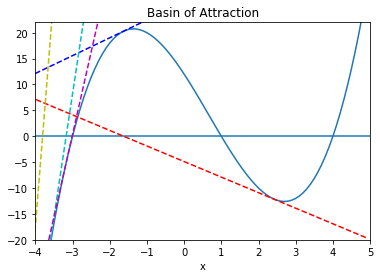

-3.1713324128480282

In [24]:
def f(x):
    return x**3 - 2*x**2 - 11*x +12
def s(x):
    return 3*x**2 - 4*x - 11

x = np.arange(-5,5, 0.1);

p1=plt.plot(x, f(x))
plt.xlim(-4, 5)
plt.ylim(-20, 22)
plt.xlabel('x')
plt.axhline(0)
plt.title('Basin of Attraction')
t = np.arange(-5, 5., 0.1)

x0=2.43
xvals = []
xvals.append(x0)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--','c--','m--','k--','w--']
while (notconverge==1 and count <  6):
    funval = f(xvals[count])
    slope = s(xvals[count])
   
    intercept=-slope*xvals[count]+funval

    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(funval) < 0.01:
        notconverge = 0
    else:
        xvals.append(nextval)
    count = count+1

plt.show()
xvals[count-1]

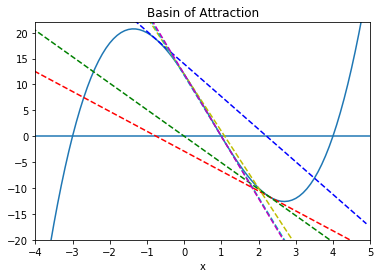

0.9991912395651094

In [25]:
p1=plt.plot(x, f(x))
plt.xlim(-4, 5)
plt.ylim(-20, 22)
plt.xlabel('x')
plt.axhline(0)
plt.title('Basin of Attraction')
t = np.arange(-5, 5., 0.1)

x0=2.349
xvals = []
xvals.append(x0)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--','c--','m--','k--','w--']
while (notconverge==1 and count <  6):
    funval = f(xvals[count])
    slope = s(xvals[count])
   
    intercept=-slope*xvals[count]+funval

    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(funval) < 0.01:
        notconverge = 0
    else:
        xvals.append(nextval)
    count = count+1

plt.show()
xvals[count-1]

### 收敛速率（Convergence Rate）

下面是对牛顿-拉普森发的收敛速率进行推导的过程：

设 $x_k \; \rightarrow \; x^*$ 而 $g'(x^*) \neq 0$。那么则有：

$$x_k = x^* + \epsilon_k$$.

接下来在 $x^*$的位置对 $g$进行展开：

$$g(x_k) = g(x^*) + g'(x^*)\epsilon_k + \frac12 g''(x^*)\epsilon_k^2 + ...$$
$$g'(x_k)=g'(x^*) + g''(x^*)\epsilon_k$$

就有了：


\begin{eqnarray}
\epsilon_{k+1} &=& \epsilon_k + \left(x_{k-1}-x_k\right)\\
&=& \epsilon_k -\frac{g(x_k)}{g'(x_k)}\\
&\approx & \frac{g'(x^*)\epsilon_k + \frac12g''(x^*)\epsilon_k^2}{g'(x^*)+g''(x^*)\epsilon_k}\\
&\approx & \frac{g''(x^*)}{2g'(x^*)}\epsilon_k^2
\end{eqnarray}

## 高斯-牛顿法（Gauss-Newton）

对于一维空间的牛顿法是：
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$


可以用如下的形式来将其泛化到 k 维度空间：
$$
x_{n+1} = x_n - J^{-1} f(x_n)
$$

其中的 $x$ 和 $f(x)$ 现在就是向量了，而 $J^{-1}$ 是一个逆雅可比矩阵（inverse Jacobian matrix）。通常，雅可比矩阵（Jacobian）并不是一个正方形矩阵（square matrix），这里用一个泛化的逆矩阵 $(J^TJ)^{-1}J^T$ 来替代，则有：

$$
x_{n+1} = x_n - (J^TJ)^{-1}J^T f(x_n)
$$


牛顿法一般都被看作一种求根方法（root finder）。然而，要注意将牛顿法用于一个可微函数的导函数找到使导数为零 $f'(x) = 0$的 $x$，给出了可微函数（differentialble function) $f$的固定点(stationary points)。因此，牛顿法也可以直接用于优化问题。例如，考虑要讲一个关于$\beta$的函数$1/2 r(\beta)^2$最小化。关于$\beta$的导数则为$r(\beta)$。因此，使用牛顿法来找到函数$r(\beta)$的跟，就可以给出能够使得$1/2 r(\beta)^2$最小化的 $\beta$值，这也表明了牛短发和最小二乘估计之间的关联。在多元非线性的估计问题中，可以通过使残差（residuals）$r(\beta)$ 最小化的方法来得到参数向量 $\beta$。

$$
\beta_{n+1} = \beta_n - (J^TJ)^{-1}J^T r(\beta_n)
$$

其中雅可比矩阵 $J$ 的项为：
$$
J_{ij} = \frac{\partial r_i(\beta)}{\partial \beta_j}
$$

## 逆向二次插值（Inverse Quadratic Interpolation）

逆向二次插值是多项式插值（polynomial interpolation）的一种。多项式插值简单来说就是要对个点集进行拟合，使用最小次数的多项式。在二次插值里面，我们用到了三个点，要找出经过这三个点的二次多项式。

逆向二次插值的意思是，我们在逆向函数上进行二次插值。也就是说，如果我们找一个函数 $f$ 的根，我们就使用二次插值去近似估计$f^{-1}(x)$。注意，这里可以把割线法看作是对函数 $f$ 的线性逆向插值法（即一次逆向插值）。可以写出下面的公式：


$$f^{-1}(y) = \frac{(y-f(x_n))(y-f(x_{n-1}))}{(f(x_{n-2})-f(x_{n-1}))(f(x_{n-2})-f(x_{n}))}x_{n-2} + \frac{(y-f(x_n))(y-f(x_{n-2}))}{(f(x_{n-1})-f(x_{n-2}))(f(x_{n-1})-f(x_{n}))}x_{n-1} + \frac{(y-f(x_{n-2}))(y-f(x_{n-1}))}{(f(x_{n})-f(x_{n-2}))(f(x_{n})-f(x_{n-1}))}x_{n-1}$$

利用上面的公式，就可以找到下一个猜测值 $x_{n+1}$ 使 $f$ 为零 (即 $y=0$)：

$$x_{n+1} = \frac{f(x_n)f(x_{n-1})}{(f(x_{n-2})-f(x_{n-1}))(f(x_{n-2})-f(x_{n}))}x_{n-2} + \frac{f(x_n)f(x_{n-2})}{(f(x_{n-1})-f(x_{n-2}))(f(x_{n-1})-f(x_{n}))}x_{n-1} + \frac{f(x_{n-2})f(x_{n-1})}{(f(x_{n})-f(x_{n-2}))(f(x_{n})-f(x_{n-1}))}x_{n}$$


收敛速率大约为 $1.8$.



## 布伦特法（Brent's Method）

布伦特法是对二分法、割线法以及逆向二次插值法的结合。与二分法类似，这也是一个使用”括号“的方法，需要两个逆号的点来开始，即$(a,b)$ ，且 $f(a)f(b)<0$。

简单来说，这个方法开始使用割线法来得到第三个点$c$，然后使用逆向二次插值来生成下一个可能的跟。这里就不说太细致了，这个算法就是先试试插值什么时候回出错，如果出错了，来一次二分法的步骤。另外还会有一些标准来判断是否拒绝迭代。如果这种情况发生了，下一步就是线性插值（割线法）。

布伦特法是 scypy 用于最小化单变量函数的默认方法（default method）。

In [26]:
from scipy.optimize import minimize_scalar

def f(x):
    return (x - 2) * x * (x + 2)**2

res = minimize_scalar(f)
res.x

1.2807764040333458

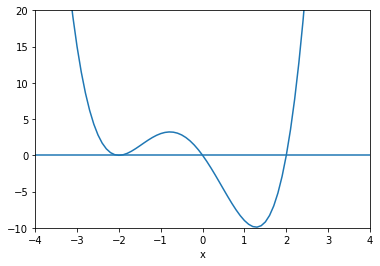

In [27]:
x = np.arange(-5,5, 0.1);
p1=plt.plot(x, f(x))
plt.xlim(-4, 4)
plt.ylim(-10, 20)
plt.xlabel('x')
plt.axhline(0)

可以使用下面的命令来找零点：

In [28]:
scipy.optimize.brentq(f,-1,.5)

-7.864845203343107e-19

In [29]:
scipy.optimize.brentq(f,.5,3)

2.0

In [30]:
scipy.optimize.newton(f,-3)

-2.0000000172499592